# Study Questions
## Imports & Constants

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from textstat.textstat import textstat
import pprint, math

%matplotlib inline
%run -i tools/datajson.py
# Ensures higher quality graphs!
%config InlineBackend.figure_format = 'retina'

In [7]:
# File Names
name = ['2017-10-02', '2017-10-06', '2017-10-16', '2017-10-25', '2017-11-01', 
        '2017-11-13', '2017-11-18', '2017-11-25', '2017-12-06', '2017-12-25']
CURRENTS = ['../../private/output/' + name + '.txt' for name in name]


[1, 2, 3]


In [3]:
def clean_question(text):
    start = text[:6].upper()
    if start == 'ELI5: ':
        return text[6:]
    start = text[:5].upper()
    if start == 'ELI5:':
        return text[5:]
    return text

## Samples Questions

Size: (1000, 3)


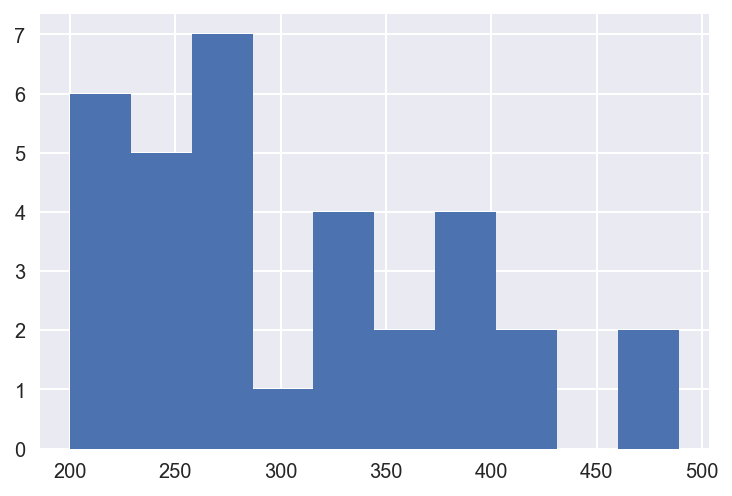

Average score: 305.06060606060606


In [4]:
collected_posts = RedditDataJSON.from_filenames(CURRENTS)
print('Size:', collected_posts.size)
raw_scores = {post['title']: int(post['score']) for post in collected_posts.posts}
texts_only = list(raw_scores.keys())
texts_only.sort(key=lambda post: raw_scores[post])

middle = [post for post in texts_only if 200 <= raw_scores[post] <= 500]
middle_scores = [raw_scores[post] for post in middle]

plt.hist(middle_scores)
plt.show()

average_score = sum(middle_scores) / len(middle)
cleaned = [clean_question(post) for post in middle]
print('Average score:', average_score)

In [5]:
# Random Sampling
questions = list(np.random.choice(cleaned, 15, replace=False))
questions

['What is the difference between forward and reverse osmosis?',
 'Why do typical spray pump bottles of cologne or perfume evaporate quickly when left on their side or "tipped over" but not upright?',
 'How Dual-Clutch Transmissions and Continuously Variable Transmissions use clutches but do not stall.',
 "What gives something it's taste? Does pyrite taste like table salt because they are both cubes?",
 "What make objects 'bouncier' than others?",
 'Why is therapy effective? What is it about the brain that allows talking about your problems to help fix them?',
 'If rockets use controlled explosions to propel forward, why can’t we use a nuclear reaction to launch/fly our rockets?',
 'Why is CPR for drowning different than CPR for people who collapse from heart problems? e.g rescue breaths are recommended for one but not the other.',
 'How does the body separates water from stomach acid?',
 'Why is the consistency of my ice cream different when it melts and I refreeze it?',
 'How can alco

In [10]:
high_baseline = average_score * 10
low_baseline = average_score // 10
high_baseline, low_baseline

(3050.6060606060605, 30.0)